In [40]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
tf.keras.backend.clear_session()

In [41]:
import warnings
warnings.filterwarnings("ignore") 


In [42]:
import tensorflow as tf

# Error remove
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.15.0


In [43]:
import cv2
import random
import gc

In [44]:
train = ["train/{}".format(i) for i in os.listdir("train/")]

In [45]:
len(train[0:100])

100

In [46]:
train[0:5]

['train/cat.0.jpg',
 'train/cat.1.jpg',
 'train/cat.10.jpg',
 'train/cat.100.jpg',
 'train/cat.1000.jpg']

In [47]:
train_cats = ["train/{}".format(i) for i in os.listdir("train/") if "cat" in i]

In [48]:
len(train_cats)

12500

In [49]:
train_dogs = ["train/{}".format(i) for i in os.listdir("train/") if "dog" in i]

In [50]:
len(train_dogs)

12500

In [51]:
train_imgs = train_cats[:2000]+train_dogs[:2000]
random.shuffle(train_imgs)

In [52]:
len(train_imgs)

4000

In [53]:
train_imgs[0:5]

['train/dog.11069.jpg',
 'train/dog.11424.jpg',
 'train/dog.10864.jpg',
 'train/cat.11011.jpg',
 'train/dog.11006.jpg']

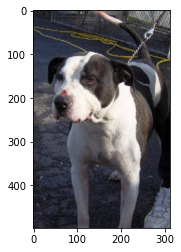

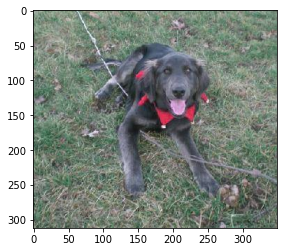

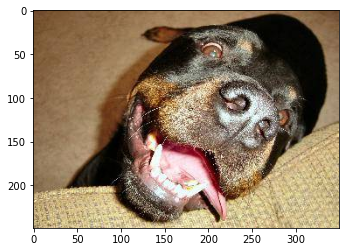

In [54]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for ima in train_imgs[0:3]:
    
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [55]:
nrows = 150
ncolumns = 150
channel = 3

In [56]:
def read_and_process_image(list_of_image):
    
    x = []
    y = []
    
    for image in list_of_image:
        #print(image)
        
        img = cv2.imread(image, cv2.IMREAD_COLOR)
        
        img = cv2.resize(img,(nrows,ncolumns),interpolation = cv2.INTER_CUBIC)
        #print(img.shape)
        
        x.append(img)
        
        if "dog" in image:
            y.append(1)
            
        elif "cat" in image:
            
            y.append(0)
            
    return x, y
        

In [57]:
x, y = read_and_process_image(train_imgs)

In [58]:
x[0]

array([[[ 49,  41,  41],
        [ 40,  32,  32],
        [ 44,  36,  36],
        ...,
        [145, 148, 146],
        [137, 140, 138],
        [116, 119, 117]],

       [[ 49,  41,  41],
        [ 43,  35,  35],
        [ 38,  30,  30],
        ...,
        [110, 111, 109],
        [149, 150, 148],
        [ 96,  97,  95]],

       [[ 38,  30,  30],
        [ 36,  28,  28],
        [ 48,  40,  40],
        ...,
        [ 67,  63,  62],
        [193, 190, 189],
        [124, 120, 119]],

       ...,

       [[ 43,  31,  31],
        [ 50,  38,  38],
        [ 59,  47,  47],
        ...,
        [104,  91,  83],
        [111,  98,  90],
        [117, 104,  96]],

       [[ 35,  23,  23],
        [ 51,  39,  39],
        [ 49,  37,  37],
        ...,
        [114, 101,  93],
        [149, 136, 128],
        [120, 107,  99]],

       [[ 43,  33,  33],
        [ 33,  23,  23],
        [ 30,  22,  22],
        ...,
        [125, 111, 105],
        [119, 105,  99],
        [ 98,  84,  77]]

In [59]:
y[0:5]

[1, 1, 1, 0, 1]

In [60]:
x = np.array(x)
y = np.array(y)

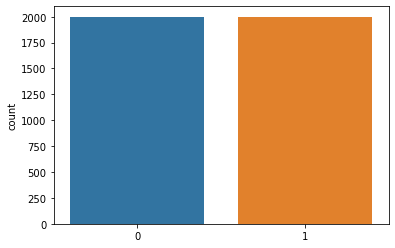

In [61]:
import seaborn as sns
sns.countplot(y)

In [62]:
x.shape

(4000, 150, 150, 3)

In [63]:
y.shape

(4000,)

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train,y_val = train_test_split(x,y,test_size = .20, random_state = 2)

In [65]:
x_train.shape

(3200, 150, 150, 3)

In [66]:
x_val.shape

(800, 150, 150, 3)

In [67]:
ntrain = len(x_train)
nval = len(x_val)

batch_size = 32

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Activation, Flatten, Dropout

In [70]:
from keras.backend import clear_session
clear_session()

# Model Architecture

In [71]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras import models
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [72]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding = "same", activation = 'relu', input_shape= (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), padding = "same", activation = 'relu'))     
model.add(MaxPooling2D((2,2)))
          
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
          


In [73]:
    
model.compile(loss= "binary_crossentropy", optimizer = RMSprop(lr= 1e-4), metrics= ["acc"])


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
__________

In [75]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)



In [76]:

train_generator = train_datagen.flow(x_train,y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)



In [77]:
# Save the model according to the conditions  

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


In [78]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain//batch_size,
                             epochs = 100,
                             validation_data = val_generator,
                             validation_steps= nval//batch_size,
                            callbacks = [checkpoint, early])


Epoch 1/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6993 - acc: 0.5244 - val_loss: 0.6632 - val_acc: 0.5925

Epoch 00001: val_acc improved from -inf to 0.59250, saving model to vgg16_1.h5
Epoch 2/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6662 - acc: 0.5872 - val_loss: 0.6551 - val_acc: 0.5750

Epoch 00002: val_acc did not improve from 0.59250
Epoch 3/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6427 - acc: 0.6244 - val_loss: 0.6053 - val_acc: 0.6587

Epoch 00003: val_acc improved from 0.59250 to 0.65875, saving model to vgg16_1.h5
Epoch 4/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6179 - acc: 0.6581 - val_loss: 0.5627 - val_acc: 0.7300

Epoch 00004: val_acc improved from 0.65875 to 0.73000, saving model to vgg16_1.h5
Epoch 5/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6096 - acc: 0.6678 - val_loss: 0.6251 - val_acc: 0.6388

Epoch 00005: val_acc d

In [79]:
model.save_weights("model_weights.h5")
model.save("mode_keras.h5")


In [80]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]



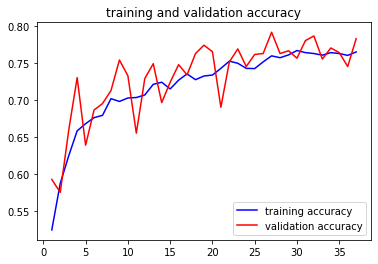

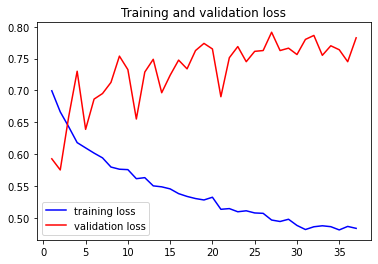

In [81]:
epochs = range(1, len(acc)+1)

# Train and validation accuracy

plt.plot(epochs,acc, "b", label = "training accuracy")
plt.plot(epochs, val_acc, "r", label = "validation accuracy")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
#train and validation loss
plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_acc, "r", label= "validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

# Model (Transfer Learning-VGG16)

In [82]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [83]:
#keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [84]:
model = VGG16(include_top= False, pooling='max', weights="imagenet",input_shape=(150,150,3))

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [86]:
# freeze first 5 layers

for layer in model.layers[:-5]:
    layer.trainable = False
    

In [87]:
# Check the trainable status of the individual layers

# for layer in model.layers:
#     print(layer, layer.trainable)


In [88]:

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg_api.png')

In [89]:
x = model.output
x = Dense(512, activation = 'relu')(x)
x = Dense(1000, activation = 'relu')(x)
x = Dropout(0.5)(x)
#x = Flatten()(x)
predictions = Dense(1, activation="softmax")(x)

In [90]:
# creating the final model 

model_vgg = Model(input = model.input, output = predictions)

In [91]:
model_vgg.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [92]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [93]:

train_generator = train_datagen.flow(x_train,y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)

In [94]:
# Save the model according to the conditions

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


In [95]:
history = model_vgg.fit_generator(train_generator,
                             steps_per_epoch = ntrain//batch_size,
                             epochs = 50,
                             validation_data = val_generator,
                             validation_steps= nval//batch_size,
                             callbacks = [checkpoint, early])

Epoch 1/50
100/100 [==============================] - 36s 356ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00001: val_acc improved from -inf to 0.50625, saving model to vgg16_1.h5
Epoch 2/50
100/100 [==============================] - 26s 263ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00002: val_acc did not improve from 0.50625
Epoch 3/50
100/100 [==============================] - 26s 260ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00003: val_acc did not improve from 0.50625
Epoch 4/50
100/100 [==============================] - 26s 260ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00004: val_acc did not improve from 0.50625
Epoch 5/50
100/100 [==============================] - 26s 263ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00005: val_acc did not improve from 0.50625
Epoch 6/50
100/100 [=====================

In [96]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

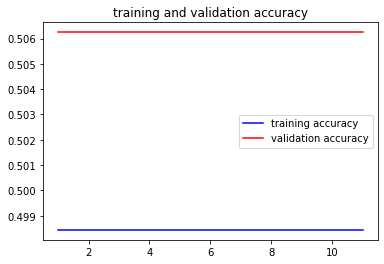

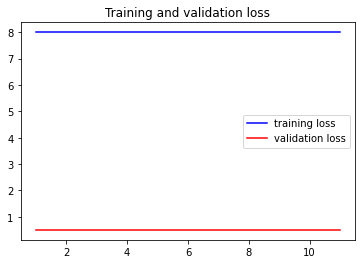

In [97]:
epochs = range(1, len(acc)+1)

# Train and validation accuracy

plt.plot(epochs,acc, "b", label = "training accuracy")
plt.plot(epochs, val_acc, "r", label = "validation accuracy")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
#train and validation loss
plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_acc, "r", label= "validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


# Model (Transfer Learning-Resnet 50)


In [98]:
from keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=False, weights='imagenet', input_shape=(150,150,3))


In [99]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [100]:
# freeze first 5 layers

for layer in model.layers[:-5]:
    layer.trainable = False

In [101]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg_api.png')

x = model.output
x = Dense(2048, activation = 'relu')(x)
x = Dense(1000, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
predictions = Dense(1, activation="softmax")(x)

In [102]:
# creating the final model 

model_resnet = Model(input = model.input, output = predictions)

model_resnet.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [103]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [104]:
train_generator = train_datagen.flow(x_train,y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)


In [105]:

# Save the model according to the conditions

checkpoint = ModelCheckpoint("resnet50.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [106]:

history = model_resnet.fit_generator(train_generator,
                             steps_per_epoch = ntrain//batch_size,
                             epochs = 50,
                             validation_data = val_generator,
                             validation_steps= nval//batch_size,
                             callbacks = [checkpoint, early])

Epoch 1/50
100/100 [==============================] - 26s 258ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00001: val_acc improved from -inf to 0.50625, saving model to resnet50.h5
Epoch 2/50
100/100 [==============================] - 22s 217ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00002: val_acc did not improve from 0.50625
Epoch 3/50
100/100 [==============================] - 22s 216ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00003: val_acc did not improve from 0.50625
Epoch 4/50
100/100 [==============================] - 22s 219ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00004: val_acc did not improve from 0.50625
Epoch 5/50
100/100 [==============================] - 22s 216ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00005: val_acc did not improve from 0.50625
Epoch 6/50
100/100 [====================

In [107]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]



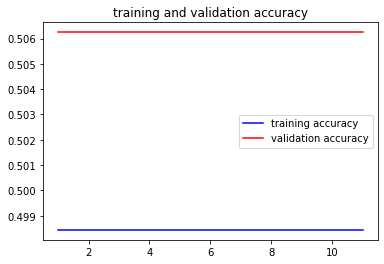

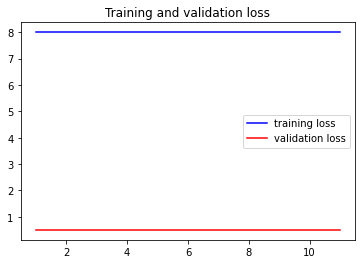

In [108]:


# Train and validation accuracy

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc, "b", label = "training accuracy")
plt.plot(epochs, val_acc, "r", label = "validation accuracy")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
#train and validation loss
plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_acc, "r", label= "validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

# Transfer Learning (Inception v3)

In [109]:
# keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [110]:
from keras.applications.inception_v3 import InceptionV3

In [111]:
model = InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(150,150,3), pooling=None, classes=1000)

In [112]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_5 (

In [113]:
# freeze first 5 layers

for layer in model.layers[:-5]:
    layer.trainable = False

In [114]:

x = model.output
x = Dense(1000, activation = 'relu')(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
predictions = Dense(1, activation="softmax")(x)


In [115]:
# creating the final model 

model_inception = Model(input = model.input, output = predictions)

model_inception.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [116]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [117]:

train_generator = train_datagen.flow(x_train,y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)

In [118]:
# Save the model according to the conditions

checkpoint = ModelCheckpoint("inception_v3.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


In [119]:
history = model_inception.fit_generator(train_generator,
                             steps_per_epoch = ntrain//batch_size,
                             epochs = 50,
                             validation_data = val_generator,
                             validation_steps= nval//batch_size,
                             callbacks = [checkpoint, early])

Epoch 1/50
100/100 [==============================] - 23s 231ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00001: val_acc improved from -inf to 0.50625, saving model to inception_v3.h5
Epoch 2/50
100/100 [==============================] - 16s 165ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00002: val_acc did not improve from 0.50625
Epoch 3/50
100/100 [==============================] - 17s 165ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00003: val_acc did not improve from 0.50625
Epoch 4/50
100/100 [==============================] - 16s 165ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00004: val_acc did not improve from 0.50625
Epoch 5/50
100/100 [==============================] - 17s 165ms/step - loss: 7.9961 - acc: 0.4984 - val_loss: 7.8716 - val_acc: 0.5062

Epoch 00005: val_acc did not improve from 0.50625
Epoch 6/50
100/100 [================

In [120]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]



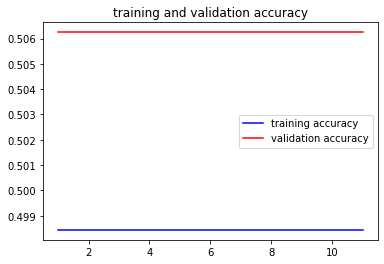

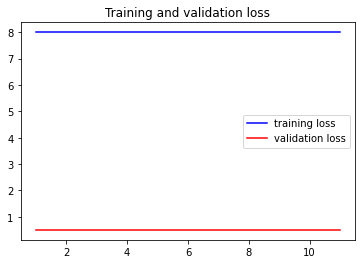

In [121]:
# epochs = range(1, len(acc)+1)

plt.plot(epochs,acc, "b", label = "training accuracy")
plt.plot(epochs, val_acc, "r", label = "validation accuracy")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
#train and validation loss
plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_acc, "r", label= "validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

# Inception Resnet v2

In [122]:
from keras.applications import InceptionResNetV2

Conv_base = InceptionResNetV2(weights = "imagenet", include_top = False, input_shape = (150,150,3))

In [123]:
Conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_99 

In [127]:
model = Sequential()
model.add(Conv_base)
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [128]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_4 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               3539200   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


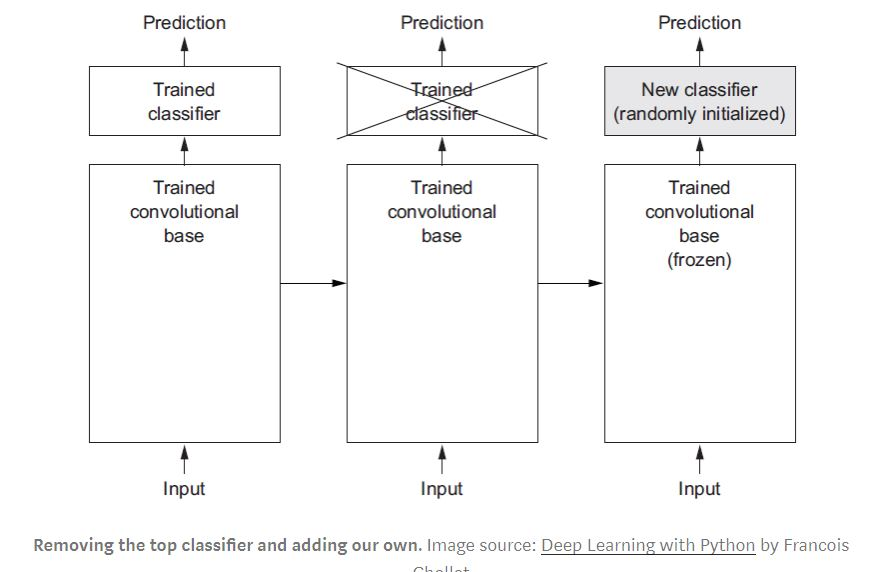

In [129]:
from IPython.display import Image
Image("Capture.JPG")

In [131]:
# Freeze the conv_base

Conv_base.trainable = False

In [132]:
# Compile 

model.compile(loss= "binary_crossentropy", optimizer = optimizers.RMSprop(lr = 2e-5),metrics = ["acc"])

In [133]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [134]:

train_generator = train_datagen.flow(x_train,y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)

In [135]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain//batch_size,
                             epochs = 20,
                             validation_data = val_generator,
                             validation_steps= nval//batch_size)

Epoch 1/20
100/100 [==============================] - 60s 595ms/step - loss: 0.5245 - acc: 0.7172 - val_loss: 0.3675 - val_acc: 0.9150
Epoch 2/20
100/100 [==============================] - 24s 235ms/step - loss: 0.4116 - acc: 0.8072 - val_loss: 0.3369 - val_acc: 0.9313
Epoch 3/20
100/100 [==============================] - 24s 236ms/step - loss: 0.3758 - acc: 0.8281 - val_loss: 0.3897 - val_acc: 0.93253847 - 
Epoch 4/20
100/100 [==============================] - 25s 251ms/step - loss: 0.3563 - acc: 0.8413 - val_loss: 0.2883 - val_acc: 0.9487
Epoch 5/20
100/100 [==============================] - 26s 258ms/step - loss: 0.3364 - acc: 0.8484 - val_loss: 0.2695 - val_acc: 0.9463
Epoch 6/20
100/100 [==============================] - 24s 242ms/step - loss: 0.3476 - acc: 0.8363 - val_loss: 0.2704 - val_acc: 0.9500
Epoch 7/20
100/100 [==============================] - 24s 236ms/step - loss: 0.3298 - acc: 0.8541 - val_loss: 0.3851 - val_acc: 0.9350
Epoch 8/20
100/100 [============================

In [136]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

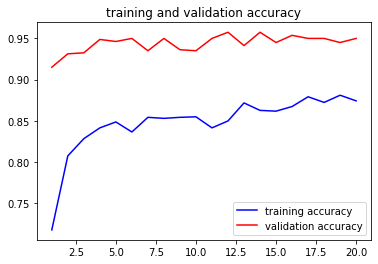

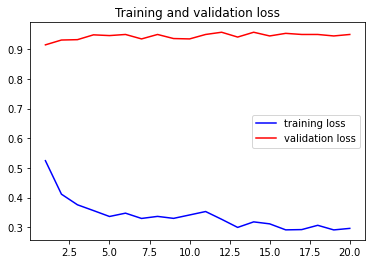

In [137]:
epochs = range(1, len(acc)+1)

# Train and validation accuracy

plt.plot(epochs,acc, "b", label = "training accuracy")
plt.plot(epochs, val_acc, "r", label = "validation accuracy")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
#train and validation loss
plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_acc, "r", label= "validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


# Test Image

In [138]:
test = ["test1/{}".format(i) for i in os.listdir("test1/")]

In [139]:
x_test,y_test = read_and_process_image(test[0:10])

In [140]:
x = np.array(x_test)
x[2].shape

(150, 150, 3)

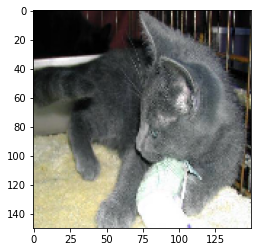

In [141]:
plt.imshow(x[2])

(150, 150, 3)


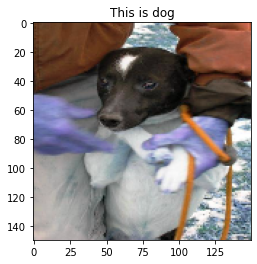

(150, 150, 3)


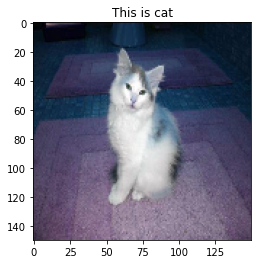

(150, 150, 3)


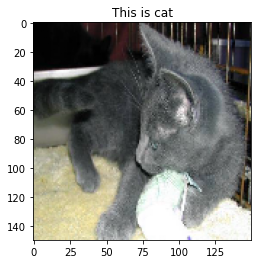

(150, 150, 3)


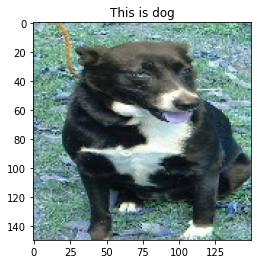

(150, 150, 3)


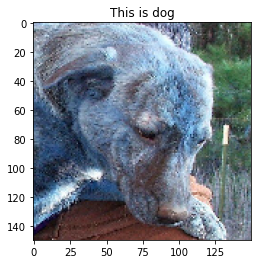

(150, 150, 3)


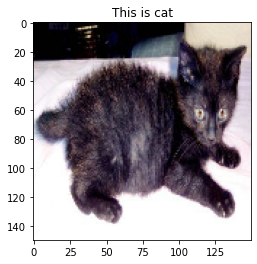

(150, 150, 3)


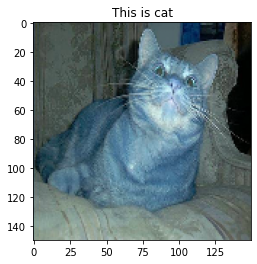

(150, 150, 3)


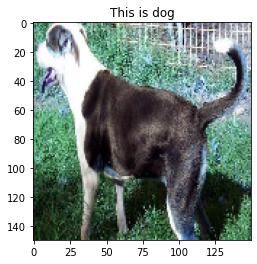

(150, 150, 3)


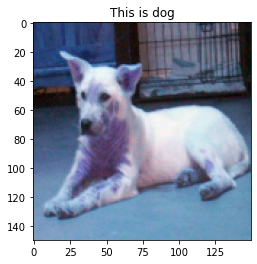

(150, 150, 3)


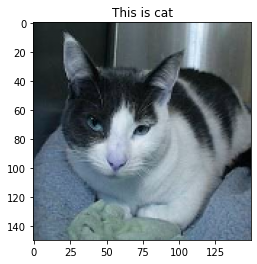

In [142]:

text_labels = []



for batch in x:
    print(batch.shape)
    
    batch = batch/255
    batch = batch.reshape(1,150,150,3)
    
    pred = model.predict(batch)
    
    if pred > 0.5 :
        lvl = "dog"
        text_labels.append(lvl)
        
    else:
        lvl = "cat"
        text_labels.append(lvl)
        

    batch = batch.reshape(150,150,3)
    plt.title("This is "+ lvl)
    plt.imshow(batch)
        
    plt.show()
    
    
    

# Hiperparameter Tuning

In [ ]:
#https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594

In [ ]:
# Load model

In [ ]:
# Generate data for generalizing the model

## Referance

In [ ]:
#https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9
#https://towardsdatascience.com/transfer-learning-and-image-classification-using-keras-on-kaggle-kernels-c76d3b030649